<a href="https://colab.research.google.com/github/Camilojaravila/202210_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/blob/main/Taller%204/Taller%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

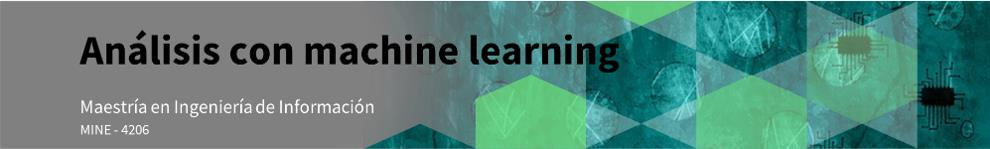

* **Integrante 1:** Deivis Vergel
* **Integrante 2:** Yeimy Andrea Cano
* **Integrante 3:** Alejandro Garcia Flores, 201326489

## **ENTENDIMIENTO DEL NEGOCIO**

### Objetivo general: 

 

Crear un sistema de recomendación usando algoritmos de Machine Learning para los estudiantes de la universidad basado en la probabilidad de ser aceptado en un cupo dado, teniendo en cuenta su programa académico, GPA, nivel de idiomas, capacidad económica e intereses de destino. 

### 0. Entendimiento del problema y los datos

Fuente de los datos y descripción inicial de los datos. 

La base de datos de movilidad y convenios de La Dirección de Internacionalización (MoveON) que está a cargo de Alejandro Garcia Flores, fue obtenida con permiso de la directora de internacionalización. La base de datos fue exportada de MoveOn en formato Excel. Esta cuenta con 4 tablas que se utilizaran en el proyecto; 



1.   Instituciones Externas (2289 registros): 

 *   Nombre de la institución. Campo de texto introducido por los gestores de relaciones externas de la dirección. 
 
 * Ciudad. Campo de texto introducido por los gestores de relaciones externas de la dirección. 

 * País: Campo de texto introducido por los gestores de relaciones externas de la dirección. 

 * Institution ID: Campo numérico entero generado automáticamente al crear una nueva institución. 

 * GPA/4: Campo decimal introducido por los gestores de movilidad en donde se indica el promedio mínimo sobre 4 para un intercambio con esta institución. 

 * Language Requierment 1: Campo de texto introducido por los gestores de movilidad en donde se indica el primer posible idioma exigido por la institución para poder realizar un intercambio. 

 * Lenguage CERF score 1: Campo de texto introducido por los gestores de movilidad en donde se indica el puntaje CERF mínimo exigido en el primer idioma por la institución para poder realizar un intercambio. 

 * Language Requierment 2: Campo de texto introducido por los gestores de movilidad en donde se indica el segundo posible idioma exigido por la institución para poder realizar un intercambio. 

 * Lenguage CERF score 2: Campo de texto introducido por los gestores de movilidad en donde se indica el puntaje CERF mínimo exigido en el primer segundo idioma por la institución para poder realizar un intercambio. 



2. Stay Opportunities: Esta tabla describe los posibles intercambios que un estudiante puede realizar y por medio de cuales convenios los puede realizar. (2008 registros) 
 * Nombre: Campo de texto introducido por los gestores de relaciones externas de la dirección que describe el nombre de la oportunidad de intercambio. 

 * Direction: Campo de texto introducido por los gestores de relaciones externas de la dirección que describe la dirección del intercambio (Entrante o saliente). 

 * Parent Relation: ID entero del convenio padre del cual se generó la oportunidad de intercambio. 

 * Degree Program: Lista separada por comas de los programas que pueden hacer uso de la oportunidad de intercambio. 

 * Level: nivel académico por el cual se puede realizar el intercambio. (Undergraduate, Máster o PhD) 

 * External institution: ID de la institución con la cual se realiza el intercambio por medio de la oportunidad de intercambio. 

 * Status:  

    1. Active: la oportunidad de intercambio se encuentra abierta en una convocatoria. 
    2. Silent: la oportunidad de intercambio se encuentra disponible pero no esta siendo usada en una convocatoria en este momento. 
    3. Terminated o Cancelled: la oportunidad de intercambio ya no puede ser utilizada. 

3. Seats: Esta tabla describe los cupos que se abren semestralmente para las Stay Opportunites desde 201820 hasta 20220: 

 * Relation Name: nombre de la Stay Opportunity a la cual se le están asignando los cupos. 

 * Academic year: año al cual aplican los cupos. 

 * Academic Period: semestre al cual aplican los cupos. 

 * Number: número de cupos que se abrieron. 

 * Remaing seats: número de cupos sin asignar. 

4. Stay Wishes: postulaciones para intercambios salientes de la universidad de los andes desde 21820 hasta 20220. (8154 registros) cada uno tiene los siguientes datos: 

 * Stay Wish ID: Identificador numérico entero de la postulacion a una universidad especifica. 

 * Stay ID: identificador numérico entero del intercambio al cual la postulacion esta vinculada 

 * Person ID: identificador numérico entero de la persona que realizo la postulacion generado por MoveON de manera automática.  

 * Rank: Prioridad dada por el estudiante al momento de realizar la postulación. Un estudiante puede postularse a 3 universidades diferentes en una sola aplicación, cada una crea un registro único en el sistema, pero todas se vinculan al mismo intercambio. Si el estudiante es rechazado en las primeras 3 postulaciones, puede realizar 3 postulaciones adicionales y todas quedan vinculadas a el mismo intercambio (Stay ID). 

 * Stay Oportunity ID: identificador numérico entero de la oportunidad de intercambio al cual el estudiante aplico. 

 * Form: Nombre de la convocatoria a la cual aplico. 

 * Start Period: Semestre en el cual comienza el intercambio. 

 * Academic Year: Año en el cual comienza el intercambio. 

 * Status Selection: Estado en el cual se encuentra la postulación: 

        1. Pending: estado inicial en el cual no se ha tomado ninguna decisión sobre la postulación. 

        1. Selected: una vez se han revisado las postulaciones, si se le otorga el cupo al estudiante en una institución especifica se le da este estado a la postulación en la cual se le otorgo el cupo. Solo 1 de las 3-6 postulaciones de un estudiante en una convocatoria dada pude tener este estado. 
        1. Rejected: estado que se le otorga a las postulaciones rechazadas por el equipo de movilidad de la universidad.  

        1. Cancelled: estado que se le otorga a una postulación si el estudiante decide cancelar el cupo antes de iniciar el intercambio. 

 * Status Offer: estado el cual establece si el estudiante acepto el cupo otorgado en una postulación: 

        1. Make Offer: se esta esperando a que el estudiante responda. 

        1. No offer: el estudiante fue rechazado por la universidad de los andes. 

        1. Offer rejected: el estudiante rechazo el cupo. 

        1. Offer acepted: el estudiante acepto el cupo y se formaliza el intercambio. 
 * Stay: GPA: Promedio del estudiante. 

 * Level: nivel académico del estudiante por el cual se postuló. (Undergraduate, Máster o PhD) 

 * Degree program: programa académico del estudiante por el cual se postuló. 

 * Stay: Idioma 1: Primer idioma por el cual realiza el requerimiento de lenguaje del intercambio. 

 * Stay: Examen 1: Examen presentado para certificar la proficiencia del primer idioma. 

 * Stay: Calificación total examen 1: Calificación total del primer examen de idioma presentado para el intercambio. 

 * Stay: Idioma 2: segundo idioma por el cual realiza el requerimiento de lenguaje del intercambio. 

 * Stay: Examen 2: Examen presentado para certificar la proficiencia del segundo idioma. 

 * Stay: Calificación total examen 2: Calificación total del segundo examen de idioma presentado para el intercambio. 

 * Stay: Idioma 3: tercer idioma por el cual realiza el requerimiento de lenguaje del intercambio. 

 * Stay: Examen 3: Examen presentado para certificar la proficiencia del tercer idioma. 

 * Stay: Calificación total examen 3: Calificación total del tercer examen de idioma presentado para el intercambio. 

 * Stay: Status: Resultado final del intercambio: 

    1. Completed: el estudiante realizo el intercambio y lo finalizo exitosamente. 
    1. Cancelled: el estudiante cancelo el intercambio. 
    1. Not Accepted: el estudiante fue rechazado. 
    1. Interrupted: el estudiante interrumpió el intercambio mientras se encontraba de viaje. 
    1. Planned: el estudiante formalizo el intercambio y esta esperando a que inicie. 
    1. New registration: el intercambio se encuentra en procesamiento. 

 * Country: País al cual el estudiante se está postulando 
 * Institución: Institución externa al cual el estudiante se está postulando. 

In [1]:
!pip install pattern
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.2 MB 1.6 MB/s 
     |████████████████████████████████| 87 kB 5.3 MB/s 
     |████████████████████████████████| 81 kB 8.4 MB/s 
     |████████████████████████████████| 5.6 MB 39.3 MB/s 
     |████████████████████████████████| 5.6 MB 44.5 MB/s 
     |████████████████████████████████| 419 kB 9.7 MB/s 
     |████████████████████████████████| 104 kB 33.3 MB/s 
     |████████████████████████████████| 4.0 MB 38.7 MB/s 
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332721 sha256=885a3fb4274601db5d4df5801143ada14dd297c507788eae2c4858198d23c9f9
  Stored in directory: /root/.cache/pip/wheels/8d/1f/4e/9b67afd2430d55dee90bd57618dd7d899f1323e5852c465682
  Created wheel for mysqlclient: filename=mysqlclient-2.1.0-cp37-cp37m-linux_x86_64.whl size=99955 sha256=717b4393c9a3a4b52070947b82e8d84b39671f33ec68144ce69b7bcd865df99c
  Stored in

In [2]:
import pandas as pd
import numpy as np
import sys
import os
import os.path as osp
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import IncrementalPCA, PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer

### Importación de datos

In [3]:
from google.colab import drive
drive.mount('/Proyecto_ML')

Mounted at /Proyecto_ML


In [5]:
url = "/Proyecto_ML/MyDrive/Proyecto ML/z|z|"

#drive.mount('/content/drive')
#url = "/content/drive/MyDrive/MeComparten/Proyecto ML/AcademicMoveWishesOutgoing.xlsx"

data = pd.read_excel(url)
data.head()

Mounted at /content/drive


,Stay wish: ID,Relation: ID,Status selection,Stay: ID,Person: ID,Form,Start period,Rank,Stay opportunity,Frameworks,...,Stay: Calificación total 1,Stay: Calificación total 2,Stay: Examen 1,Stay: Idioma 1,Stay: Idioma 2,Stay: Idioma 3,Stay: Examen 3,Stay: Calificación total 3,Stay: GPA outgoing,Stay: Examen 2
0,3978,2053.0,Cancelled,11199,11131,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,"Internship - University of California, Santa C...",Research Internship,...,98,NaN,TOEFL,English,NaN,NaN,NaN,NaN,NaN,NaN
1,3990,2053.0,Cancelled,11204,11132,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,"Internship - University of California, Santa C...",Research Internship,...,"6,5",NaN,IELTS,English,NaN,NaN,NaN,NaN,NaN,NaN
2,3994,2053.0,Rejected,11207,11133,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,"Internship - University of California, Santa C...",Research Internship,...,111,NaN,TOEFL,English,NaN,NaN,NaN,NaN,NaN,NaN
3,3998,2053.0,Cancelled,11209,11135,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,"Internship - University of California, Santa C...",Research Internship,...,102,NaN,TOEFL,English,NaN,NaN,NaN,NaN,NaN,NaN
4,4000,2053.0,Rejected,11210,3989,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,"Internship - University of California, Santa C...",Research Internship,...,8,NaN,IELTS,English,NaN,NaN,NaN,NaN,NaN,NaN


Preparación de los datos:

In [6]:
def lable_mobility(row):
  if row["Status selection"] == "Selected":
    return 1
  elif row["Status selection"] == "Rejected":
    return 0
  elif row["Status offer"] == "Offer accepted":
    return 1
  elif row["Status offer"] == "Offer rejected":
    return 1
  elif row["Status offer"] == "No offer":
    return 0
  elif row["Stay: Status"] == "Not accepted":
    return 0
  elif row["Stay: Status"] == "Completed":
    return 1
  elif row["Stay: Status"] == "Planned":
    return 1
  elif row["Stay: Status"] == "Current":
    return 1
  else:
    return -1

In [7]:
lb_make = LabelEncoder()
data_clean = data
data_clean['Mobility'] = data_clean.apply (lambda row: lable_mobility(row), axis=1)
data_clean = data_clean[data_clean['Mobility'] >= 0]
data_clean

,Stay wish: ID,Relation: ID,Status selection,Stay: ID,Person: ID,Form,Start period,Rank,Stay opportunity,Frameworks,...,Stay: Calificación total 2,Stay: Examen 1,Stay: Idioma 1,Stay: Idioma 2,Stay: Idioma 3,Stay: Examen 3,Stay: Calificación total 3,Stay: GPA outgoing,Stay: Examen 2,Mobility
0,3978,2053.0,Cancelled,11199,11131,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,"Internship - University of California, Santa C...",Research Internship,...,NaN,TOEFL,English,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3990,2053.0,Cancelled,11204,11132,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,"Internship - University of California, Santa C...",Research Internship,...,NaN,IELTS,English,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3994,2053.0,Rejected,11207,11133,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,"Internship - University of California, Santa C...",Research Internship,...,NaN,TOEFL,English,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3998,2053.0,Cancelled,11209,11135,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,"Internship - University of California, Santa C...",Research Internship,...,NaN,TOEFL,English,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4000,2053.0,Rejected,11210,3989,2020 - Becas Pasantías Fac. Arquitectura y Diseño,First Semester 2020,2.0,"Internship - University of California, Santa C...",Research Internship,...,NaN,IELTS,English,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9068,1798,926.0,Rejected,3667,4168,201910 - Outgoing,First Semester 2019,3.0,Study Abroad-Universidad Carlos III de Madrid-...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9072,5686,1100.0,Selected,12633,12933,202019 - SURF general,Inter-semester 2020,1.0,SURF-Cornell University-Universidad de los And...,SURF,...,NaN,TOEFL,English,NaN,NaN,NaN,NaN,"3,80",NaN,1
9073,4237,1024.0,Selected,11593,11679,202020 - Outgoing,Second Semester 2021,1.0,Exchange Student-Technische Universiteit Eindh...,Exchange Student Undergraduate,...,NaN,TOEFL,English,NaN,NaN,NaN,NaN,"4,18",NaN,1
9074,4240,136.0,Rejected,11593,11679,202020 - Outgoing,Second Semester 2020,2.0,SMILE-Exchange Student-Lunds Universitet-Schoo...,Exchange Student Undergraduate,...,NaN,TOEFL,English,NaN,NaN,NaN,NaN,"4,18",NaN,0


In [8]:
data_clean_rank1 = data_clean[data_clean['Rank'] == 1]
data_clean_rank2 = data_clean[data_clean['Rank'] == 2]
data_clean_rank3 = data_clean[data_clean['Rank'] == 3]
rank1_pass = data_clean_rank1[data_clean_rank1['Mobility'] == 1]
for index, row in rank1_pass.iterrows():
  data_clean_rank2 = data_clean_rank2[data_clean_rank2["Stay: ID"] != row["Stay: ID"]]
  data_clean_rank3 = data_clean_rank3[data_clean_rank3["Stay: ID"] != row["Stay: ID"]]

rank2_pass = data_clean_rank2[data_clean_rank2['Mobility'] == 1]
for index, row in rank2_pass.iterrows():
  data_clean_rank3 = data_clean_rank3[data_clean_rank3["Stay: ID"] != row["Stay: ID"]]

data_clean = pd.concat([data_clean_rank1,data_clean_rank2], ignore_index=True)
data_clean = pd.concat([data_clean,data_clean_rank3], ignore_index=True)
data_clean = data_clean.reset_index(drop=True)
data_clean

,Stay wish: ID,Relation: ID,Status selection,Stay: ID,Person: ID,Form,Start period,Rank,Stay opportunity,Frameworks,...,Stay: Calificación total 2,Stay: Examen 1,Stay: Idioma 1,Stay: Idioma 2,Stay: Idioma 3,Stay: Examen 3,Stay: Calificación total 3,Stay: GPA outgoing,Stay: Examen 2,Mobility
0,7297,429.0,Selected,14339,14278,202020 - Outgoing,Second Semester 2020,1.0,Exchange Student-University of New South Wales...,Exchange Student Undergraduate,...,NaN,Other,English,NaN,NaN,NaN,NaN,"4,26",NaN,1
1,4338,733.0,Selected,11639,11728,202020 - Outgoing,Second Semester 2021,1.0,Exchange Student-National Chengchi University-...,Exchange Student Undergraduate,...,NaN,IELTS,English,NaN,NaN,NaN,NaN,"3,94",NaN,1
2,4478,1305.0,Rejected,11704,7935,202020 - Outgoing,Second Semester 2020,1.0,Exchange Student-Università Commerciale 'Luigi...,Exchange Student Undergraduate,...,C2,Other,English,German,NaN,NaN,NaN,"4,01",Other,0
3,2651,596.0,Rejected,7749,8051,201920 - Outgoing,Second Semester 2019,1.0,Exchange Student-Université Toulouse 1 Capitol...,Exchange Student Undergraduate,...,NaN,TOEFL,English,French,English,Other,6/7,"4,15",NaN,0
4,1186,981.0,Selected,3450,3990,201910 - Outgoing,First Semester 2019,1.0,Exchange Student-Maastricht University-School ...,NaN,...,NaN,TOEFL,English,NaN,NaN,NaN,NaN,"4,20",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,2770,462.0,Selected,7786,8084,201920 - Outgoing,Second Semester 2019,3.0,Exchange Student-Zeppelin University-Universid...,Exchange Student Undergraduate,...,NaN,Other,English,NaN,NaN,NaN,NaN,"4,01",NaN,1
4120,8604,2094.0,Selected,15043,13636,202120 - Outgoing,Second Semester 2021,3.0,SMILE-Exchange Student Undergraduate-Universit...,SMILE,...,93,TOEFL,English,English,NaN,NaN,NaN,"4,27",TOEFL,1
4121,13265,2432.0,Selected,18394,16878,202220 - Outgoing,Second Semester 2022,3.0,CINDA-Universitat Politècnica de Catalunya-Uni...,CINDA,...,NaN,TOEFL,Spanish,NaN,NaN,NaN,NaN,"4,23",NaN,1
4122,263,371.0,Selected,2439,2915,201820 - Outgoing test,Second Semester 2018,3.0,Exchange Student-Université de Strasbourg-Scho...,NaN,...,62,TOEFL,NaN,NaN,NaN,NaN,NaN,"3,76",NaN,1


In [9]:
data_clean = data_clean[data_clean["Frameworks"] == "Exchange Student Undergraduate"]
data_clean.drop(['Frameworks'], inplace=True, axis=1)
data_clean.drop(['Rank'], inplace=True, axis=1)
data_clean.drop(['Stay wish: ID'], inplace=True, axis=1)
data_clean.drop(['Person: ID'], inplace=True, axis=1)
data_clean.drop(['Stay: ID'], inplace=True, axis=1)
data_clean.drop(["Form"], inplace=True, axis=1)
data_clean.drop(["Level"], inplace=True, axis=1)
data_clean.drop(["Stay: Calificación total 1"], inplace=True, axis=1)
data_clean.drop(["Stay: Calificación total 2"], inplace=True, axis=1)
data_clean.drop(["Stay: Calificación total 3"], inplace=True, axis=1)
data_clean.drop(["Stay: Examen 1"], inplace=True, axis=1)
data_clean.drop(["Stay: Examen 2"], inplace=True, axis=1)
data_clean.drop(["Stay: Examen 3"], inplace=True, axis=1)
data_clean.drop(["Status selection"], inplace=True, axis=1)
data_clean.drop(["Status offer"], inplace=True, axis=1)
data_clean.drop(["Stay: Status"], inplace=True, axis=1)
data_clean.drop(["Academic year"], inplace=True, axis=1)
data_clean.drop(["Start period"], inplace=True, axis=1)
data_clean.drop(["Status nomination"], inplace=True, axis=1)
data_clean.drop(["Stay opportunity"], inplace=True, axis=1)
data_clean.drop(["Relation: ID"], inplace=True, axis=1)
data_clean = data_clean.reset_index(drop=True)
data_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Institution,Stay: Degree programme,Stay: Semestre actual de estudios,Stay: Idioma 1,Stay: Idioma 2,Stay: Idioma 3,Stay: GPA outgoing,Mobility
0,Australia,University of New South Wales,Law Bsc,8.0,English,NaN,NaN,"4,26",1
1,Taiwan,National Chengchi University,NaN,5.0,English,NaN,NaN,"3,94",1
2,Italy,Università Commerciale 'Luigi Bocconi' di Milano,NaN,5.0,English,German,NaN,"4,01",0
3,France,Université Toulouse 1 Capitole,Economics Bsc,5.0,English,French,English,"4,15",0
4,Spain,Universitat Politècnica de Catalunya,NaN,6.0,English,NaN,NaN,"4,58",1
...,...,...,...,...,...,...,...,...,...
2144,Italy,Università degli Studi di Perugia,Law Bsc,7.0,English,Italian,NaN,"4,33",1
2145,Germany,Eberhard Karls Universität Tübingen,Biomedical Engineering Bsc,9.0,English,NaN,NaN,"3,84",1
2146,Belgium,Universiteit Antwerpen,Economics Bsc,5.0,English,NaN,NaN,"3,93",1
2147,Australia,Curtin University,Design Bsc,8.0,English,NaN,NaN,"3,86",1


In [10]:
data_clean["Idiomas"] = data_clean["Stay: Idioma 1"].astype(str) +"|"+data_clean["Stay: Idioma 2"].astype(str)
data_clean["Idiomas"] = data_clean["Idiomas"].astype(str) +"|"+data_clean["Stay: Idioma 3"].astype(str)
data_clean.drop(["Stay: Idioma 1"], inplace=True, axis=1)
data_clean.drop(["Stay: Idioma 2"], inplace=True, axis=1)
data_clean.drop(["Stay: Idioma 3"], inplace=True, axis=1)
data_clean['Idiomas']=data_clean['Idiomas'].str.split('|')
data_clean

,Country,Institution,Stay: Degree programme,Stay: Semestre actual de estudios,Stay: GPA outgoing,Mobility,Idiomas
0,Australia,University of New South Wales,Law Bsc,8.0,"4,26",1,"[English, nan, nan]"
1,Taiwan,National Chengchi University,NaN,5.0,"3,94",1,"[English, nan, nan]"
2,Italy,Università Commerciale 'Luigi Bocconi' di Milano,NaN,5.0,"4,01",0,"[English, German, nan]"
3,France,Université Toulouse 1 Capitole,Economics Bsc,5.0,"4,15",0,"[English, French, English]"
4,Spain,Universitat Politècnica de Catalunya,NaN,6.0,"4,58",1,"[English, nan, nan]"
...,...,...,...,...,...,...,...
2144,Italy,Università degli Studi di Perugia,Law Bsc,7.0,"4,33",1,"[English, Italian, nan]"
2145,Germany,Eberhard Karls Universität Tübingen,Biomedical Engineering Bsc,9.0,"3,84",1,"[English, nan, nan]"
2146,Belgium,Universiteit Antwerpen,Economics Bsc,5.0,"3,93",1,"[English, nan, nan]"
2147,Australia,Curtin University,Design Bsc,8.0,"3,86",1,"[English, nan, nan]"


In [11]:
label = data_clean['Idiomas']
mlb = MultiLabelBinarizer()
one_hot = pd.DataFrame(data=mlb.fit_transform(label),columns=mlb.classes_)
one_hot.drop(["nan"], inplace=True, axis=1)
one_hot.drop(["Spanish"], inplace=True, axis=1)
one_hot.head()

,Chinese,English,French,German,Italian,Japanese,Korean,Portuguese
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [12]:
data_clean.reset_index(drop=True, inplace=True)
one_hot.reset_index(drop=True, inplace=True)
data_clean = pd.concat([data_clean, one_hot], axis=1)
data_clean.head()

,Country,Institution,Stay: Degree programme,Stay: Semestre actual de estudios,Stay: GPA outgoing,Mobility,Idiomas,Chinese,English,French,German,Italian,Japanese,Korean,Portuguese
0,Australia,University of New South Wales,Law Bsc,8.0,"4,26",1,"[English, nan, nan]",0,1,0,0,0,0,0,0
1,Taiwan,National Chengchi University,NaN,5.0,"3,94",1,"[English, nan, nan]",0,1,0,0,0,0,0,0
2,Italy,Università Commerciale 'Luigi Bocconi' di Milano,NaN,5.0,"4,01",0,"[English, German, nan]",0,1,0,1,0,0,0,0
3,France,Université Toulouse 1 Capitole,Economics Bsc,5.0,"4,15",0,"[English, French, English]",0,1,1,0,0,0,0,0
4,Spain,Universitat Politècnica de Catalunya,NaN,6.0,"4,58",1,"[English, nan, nan]",0,1,0,0,0,0,0,0


In [13]:
data_clean.drop(["Idiomas"], inplace=True, axis=1)
data_clean["Country"] = lb_make.fit_transform(data_clean["Country"])
data_clean["Institution"] = lb_make.fit_transform(data_clean["Institution"])
data_clean["Stay: Degree programme"] = lb_make.fit_transform(data_clean["Stay: Degree programme"])
data_clean["Stay: GPA outgoing"]=data_clean["Stay: GPA outgoing"].str.replace(',','.').astype(float)
data_clean = data_clean.fillna(0)
data_clean

,Country,Institution,Stay: Degree programme,Stay: Semestre actual de estudios,Stay: GPA outgoing,Mobility,Chinese,English,French,German,Italian,Japanese,Korean,Portuguese
0,1,141,21,8.0,4.26,1,0,1,0,0,0,0,0,0
1,28,70,35,5.0,3.94,1,0,1,0,0,0,0,0,0
2,13,150,35,5.0,4.01,0,0,1,0,1,0,0,0,0
3,10,169,12,5.0,4.15,0,0,1,1,0,0,0,0,0
4,25,125,35,6.0,4.58,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,13,153,21,7.0,4.33,1,0,1,0,0,1,0,0,0
2145,11,22,6,9.0,3.84,1,0,1,0,0,0,0,0,0
2146,2,129,12,5.0,3.93,1,0,1,0,0,0,0,0,0
2147,1,15,10,8.0,3.86,1,0,1,0,0,0,0,0,0


In [14]:
ProfileReport(data_clean,minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se realiza la división de datos para entrenamiento y validación.

In [15]:
train, test = train_test_split(data_clean, test_size=0.2, random_state=33)
train.head()

,Country,Institution,Stay: Degree programme,Stay: Semestre actual de estudios,Stay: GPA outgoing,Mobility,Chinese,English,French,German,Italian,Japanese,Korean,Portuguese
752,3,121,4,5.0,3.93,1,0,0,0,0,0,0,0,0
341,1,138,35,5.0,4.20,0,0,1,0,0,0,0,0,0
490,17,64,35,7.0,4.11,1,0,1,0,0,0,0,0,0
597,30,96,0,6.0,3.50,0,0,1,0,0,0,0,0,0
543,11,33,35,5.0,4.20,0,0,1,0,0,0,0,0,0


In [16]:
X_train, y_train = train.drop(['Mobility'],axis=1), train['Mobility'] 
display(X_train)
y_train

,Country,Institution,Stay: Degree programme,Stay: Semestre actual de estudios,Stay: GPA outgoing,Chinese,English,French,German,Italian,Japanese,Korean,Portuguese
752,3,121,4,5.0,3.93,0,0,0,0,0,0,0,0
341,1,138,35,5.0,4.20,0,1,0,0,0,0,0,0
490,17,64,35,7.0,4.11,0,1,0,0,0,0,0,0
597,30,96,0,6.0,3.50,0,1,0,0,0,0,0,0
543,11,33,35,5.0,4.20,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,3,75,35,9.0,3.63,0,0,0,0,0,0,0,0
102,13,73,10,4.0,4.42,0,1,0,0,0,0,0,0
57,29,135,7,5.0,4.34,0,1,0,0,0,0,0,0
578,25,100,35,4.0,4.56,0,1,0,0,0,0,0,0


752     1
341     0
490     1
597     0
543     0
       ..
2109    0
102     1
57      0
578     0
1752    1
Name: Mobility, Length: 1719, dtype: int64

## **MODELAMIENTO**

### **Modelo usando multinomial Naive Bayes**

In [17]:
naive = MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB()

In [18]:
test3 = test
y_pred_train_MB = naive.predict(X_train)
y_pred_test_MB = naive.predict(test3.drop(['Mobility'],axis=1))
y_pred_test_MB

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [19]:
report_MB1 = classification_report(y_train, y_pred_train_MB)

print("Train Report for Multinomial Bayes\n", report_MB1)

report_test_MB = classification_report(test["Mobility"], y_pred_test_MB)

print("Test Report for Multinomial Bayes\n", report_test_MB)

Train Report for Multinomial Bayes
               precision    recall  f1-score   support

           0       0.57      0.57      0.57       923
           1       0.50      0.50      0.50       796

    accuracy                           0.54      1719
   macro avg       0.54      0.54      0.54      1719
weighted avg       0.54      0.54      0.54      1719

Test Report for Multinomial Bayes
               precision    recall  f1-score   support

           0       0.67      0.56      0.61       259
           1       0.46      0.57      0.51       171

    accuracy                           0.57       430
   macro avg       0.57      0.57      0.56       430
weighted avg       0.59      0.57      0.57       430



#### Buscando hiperparametros de NB

In [20]:
parameters = {
              'alpha':[0, 0.001, 0.1, 0.5, 0.7, 1, 3, 5]
            }

naive = MultinomialNB()

grid_search_NB = GridSearchCV(naive, parameters, scoring='accuracy', cv=5, error_score=0.0)

In [21]:
grid_search_NB.fit(X_train,y_train)
best_model_NB = grid_search_NB.best_estimator_


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


In [22]:
grid_search_NB.best_params_

{'alpha': 1}

In [23]:
y_pred_train_NB = best_model_NB.predict(X_train)
report_NB = classification_report(y_train, y_pred_train_NB)
print("Train Report for M Naive Bayes\n", report_NB)

y_pred_test_NB = best_model_NB.predict(test.drop(['Mobility'],axis=1))
report_test_NB = classification_report(test["Mobility"], y_pred_test_NB)
print("Test Report for M Naive Bayes\n", report_test_MB)

Train Report for M Naive Bayes
               precision    recall  f1-score   support

           0       0.57      0.57      0.57       923
           1       0.50      0.50      0.50       796

    accuracy                           0.54      1719
   macro avg       0.54      0.54      0.54      1719
weighted avg       0.54      0.54      0.54      1719

Test Report for M Naive Bayes
               precision    recall  f1-score   support

           0       0.67      0.56      0.61       259
           1       0.46      0.57      0.51       171

    accuracy                           0.57       430
   macro avg       0.57      0.57      0.56       430
weighted avg       0.59      0.57      0.57       430



### **Modelo usando KNeighborsClassifier**

In [24]:
 kneighbors = KNeighborsClassifier()
 kneighbors.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred_train_KN = kneighbors.predict(X_train)
report_KN = classification_report(y_train, y_pred_train_KN)

print("Train Report\n", report_KN)

Train Report
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       923
           1       0.73      0.68      0.70       796

    accuracy                           0.74      1719
   macro avg       0.74      0.73      0.73      1719
weighted avg       0.74      0.74      0.74      1719



In [26]:
y_pred_test_KN = kneighbors.predict(test.drop(['Mobility'],axis=1))
report_KN = classification_report(test['Mobility'], y_pred_test_KN)

print("Train Report\n", report_KN)

Train Report
               precision    recall  f1-score   support

           0       0.67      0.64      0.65       259
           1       0.49      0.52      0.50       171

    accuracy                           0.59       430
   macro avg       0.58      0.58      0.58       430
weighted avg       0.60      0.59      0.59       430



#### Buscando hiperparametros de KNN

In [27]:
estimators = [
        ('classifier', KNeighborsClassifier())          
    ]

pipeKN = Pipeline(estimators)
pipeKN.fit(X_train, y_train)

parameters = {
              'classifier__n_neighbors':[4,5,6,7,8,10,30],
              'classifier__weights':['uniform', 'distance'],
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'classifier__leaf_size':[3,5,6,7,8,10,20]
            }

grid_search_kn = GridSearchCV(pipeKN, parameters, scoring='accuracy', cv=5, error_score=0.0)

In [28]:
grid_search_kn.fit(X_train,y_train)
best_model_KN = grid_search_kn.best_estimator_


In [29]:
grid_search_kn.best_params_

{'classifier__algorithm': 'auto',
 'classifier__leaf_size': 3,
 'classifier__n_neighbors': 8,
 'classifier__weights': 'distance'}

In [30]:
y_pred_train_KN = best_model_KN.predict(X_train)
report_KN = classification_report(y_train, y_pred_train_KN)
print("Train Report for kneighbors\n", report_KN)

y_pred_test_KN = best_model_KN.predict(test.drop(['Mobility'],axis=1))
report_test_KN = classification_report(test["Mobility"], y_pred_test_KN)
print("Test Report for kneighbors\n", report_test_KN)

Train Report for kneighbors
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       923
           1       1.00      0.99      1.00       796

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719

Test Report for kneighbors
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       259
           1       0.50      0.53      0.51       171

    accuracy                           0.60       430
   macro avg       0.59      0.59      0.59       430
weighted avg       0.60      0.60      0.60       430



### **Modelo usando Regresión Logística**



In [31]:
regresion = LogisticRegression(multi_class='ovr', solver='liblinear')
regresion.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [32]:
y_pred_train_LR = regresion.predict(X_train)
y_pred_train_LR

array([0, 1, 1, ..., 0, 0, 0])

In [33]:
report_LR = classification_report(y_train, y_pred_train_LR)

print("Train Report for Logistic Regression\n", report_LR)

Train Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.59      0.73      0.65       923
           1       0.57      0.42      0.48       796

    accuracy                           0.59      1719
   macro avg       0.58      0.57      0.57      1719
weighted avg       0.58      0.59      0.58      1719



#### Buscando hiperparametros de Regresión Logística

In [34]:
#regresion = LogisticRegression(multi_class='ovr', solver='liblinear')
estimators = [
        ('classifier', LogisticRegression())          
    ]

pipeLR = Pipeline(estimators)
pipeLR.fit(X_train, y_train)

parameters = {
              'classifier__C':[1, 3, 4, 7, 10, 30],
              'classifier__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'classifier__multi_class':['auto', 'ovr', 'multinomial']
            }

grid_search_LR = GridSearchCV(pipeLR, parameters, scoring='accuracy', cv=5, error_score=0.0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [35]:
grid_search_LR.fit(X_train,y_train)
best_model_LR = grid_search_LR.best_estimator_


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [36]:
grid_search_LR.best_params_

{'classifier__C': 30,
 'classifier__multi_class': 'multinomial',
 'classifier__solver': 'lbfgs'}

In [37]:
y_pred_train_LR = best_model_LR.predict(X_train)
report_KN = classification_report(y_train, y_pred_train_KN)
print("Train Report for Regresion Linear\n", report_KN)

y_pred_test_LR = best_model_LR.predict(test.drop(['Mobility'],axis=1))
report_test_LR = classification_report(test["Mobility"], y_pred_test_LR)
print("Test Report for  Regresion Linear\n", report_test_LR)

Train Report for Regresion Linear
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       923
           1       1.00      0.99      1.00       796

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719

Test Report for  Regresion Linear
               precision    recall  f1-score   support

           0       0.64      0.70      0.67       259
           1       0.46      0.39      0.42       171

    accuracy                           0.58       430
   macro avg       0.55      0.55      0.54       430
weighted avg       0.57      0.58      0.57       430



### **Modelo usando Random Forest**

In [38]:
random = RandomForestClassifier(max_depth=8,random_state=0)
random.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [39]:
y_pred_train_RF = random.predict(X_train)
report_RF = classification_report(y_train, y_pred_train_RF)

print("Train Report\n", report_RF)

Train Report
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       923
           1       0.80      0.72      0.76       796

    accuracy                           0.79      1719
   macro avg       0.79      0.78      0.78      1719
weighted avg       0.79      0.79      0.79      1719



In [40]:
y_pred_test_RF = random.predict(test.drop(['Mobility'],axis=1))
report_RF_val = classification_report(test["Mobility"], y_pred_test_RF)

print("Test Report\n", report_RF_val)

Test Report
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       259
           1       0.60      0.57      0.59       171

    accuracy                           0.68       430
   macro avg       0.66      0.66      0.66       430
weighted avg       0.68      0.68      0.68       430



#### Buscando hiperparametros de Random Forest

In [41]:
#RandomForestClassifier(max_depth=8,random_state=0)
estimators = [
        ('classifier', RandomForestClassifier())          
    ]

pipeRF = Pipeline(estimators)
pipeRF.fit(X_train, y_train)

parameters = {
              'classifier__max_depth':[8,10,20,None],
              'classifier__n_estimators':[10,30,50,100,200,500],
              'classifier__criterion': ['gini', 'entropy', 'log_loss'],
              'classifier__max_features':[0, 0.5, 1, None, 'sqrt', 'log2'],
              'classifier__random_state':[0, 32]
            }

grid_search_RF = GridSearchCV(pipeRF, parameters, scoring='accuracy', cv=5, error_score=0.0)

In [42]:
grid_search_RF.fit(X_train,y_train)
best_model_RF = grid_search_RF.best_estimator_


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to 0.0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-p

In [43]:
grid_search_RF.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': None,
 'classifier__max_features': None,
 'classifier__n_estimators': 500,
 'classifier__random_state': 32}

In [44]:
y_pred_train_RF = best_model_RF.predict(X_train)
report_RF = classification_report(y_train, y_pred_train_RF)
print("Train Report for Random Forest\n", report_RF)

y_pred_test_RF = best_model_RF.predict(test.drop(['Mobility'],axis=1))
report_test_RF = classification_report(test["Mobility"], y_pred_test_RF)
print("Test Report for Random Forest\n", report_test_RF)

Train Report for Random Forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       923
           1       1.00      1.00      1.00       796

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719

Test Report for Random Forest
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       259
           1       0.58      0.61      0.60       171

    accuracy                           0.67       430
   macro avg       0.66      0.66      0.66       430
weighted avg       0.67      0.67      0.67       430



### **Modelo usando DecisionTree**

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Modeling
dt_model = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

y_pred_train_DT = dt_model.predict(X_train)
report_DT = classification_report(y_train, y_pred_train_DT)

print("Train Report DecisionTree\n", report_DT)

y_pred_test_DT = dt_model.predict(test.drop(['Mobility'],axis=1))
report_DT_val = classification_report(test["Mobility"], y_pred_test_DT)

print("Test Report DecisionTree\n", report_DT_val)
test4 = test
# Prediction
def Prediction(model):
    pred_prob = pd.DataFrame(model.predict_proba(test4.drop(['Mobility'],axis=1)))
    pred = pd.DataFrame(model.predict(test4.drop(['Mobility'],axis=1)))
    pred = pd.concat([test.reset_index()["Mobility"],pred_prob,pred],axis=1, ignore_index=True)
    pred.columns = ['Actual','Y_prob (1)', 'Y_prob (2)', 'Y_pred']
    return(pred)
dt_pred = Prediction(dt_model)  

# Actual vs. Prediction
pd.crosstab(dt_pred['Y_pred'],dt_pred['Actual']).apply(lambda x: x/x.sum(), axis=1).round(2)

Train Report DecisionTree
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       923
           1       1.00      0.99      1.00       796

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719

Test Report DecisionTree
               precision    recall  f1-score   support

           0       0.71      0.65      0.68       259
           1       0.53      0.59      0.56       171

    accuracy                           0.63       430
   macro avg       0.62      0.62      0.62       430
weighted avg       0.63      0.63      0.63       430



Actual,0,1
Y_pred,,
0,0.71,0.29
1,0.47,0.53


#### Buscando hiperparametros de DecisionTree

In [46]:
#dt_model = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
estimators = [
        ('classifier', DecisionTreeClassifier())          
    ]

pipeDT = Pipeline(estimators)
pipeDT.fit(X_train, y_train)

parameters = {
              'classifier__max_depth':[100,50,20,10,5,3],
              'classifier__criterion': ['gini', 'entropy', 'log_loss'],
              'classifier__random_state':[32]
            }

grid_search_DT = GridSearchCV(pipeDT, parameters, scoring='accuracy', cv=5, error_score=0.0)

In [47]:
grid_search_DT.fit(X_train,y_train)
best_model_DT = grid_search_DT.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to 0.0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sk

In [48]:
grid_search_DT.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 10,
 'classifier__random_state': 32}

In [49]:
y_pred_train_DT = best_model_DT.predict(X_train)
report_DT = classification_report(y_train, y_pred_train_DT)
print("Train Report for Decision Tree\n", report_DT)

y_pred_test_DT = best_model_DT.predict(test.drop(['Mobility'],axis=1))
report_test_DT = classification_report(test["Mobility"], y_pred_test_DT)
print("Test Report for Decision Tree\n", report_test_DT)

Train Report for Decision Tree
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       923
           1       0.84      0.80      0.82       796

    accuracy                           0.84      1719
   macro avg       0.84      0.83      0.84      1719
weighted avg       0.84      0.84      0.84      1719

Test Report for Decision Tree
               precision    recall  f1-score   support

           0       0.70      0.65      0.67       259
           1       0.52      0.58      0.55       171

    accuracy                           0.62       430
   macro avg       0.61      0.62      0.61       430
weighted avg       0.63      0.62      0.63       430



### **Modelo usando SVM**

In [50]:
svm = SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [51]:
y_pred_train_VS = svm.predict(X_train)
report_VS = classification_report(y_train, y_pred_train_VS)

print("Train Report\n", report_VS)

Train Report
               precision    recall  f1-score   support

           0       0.56      0.83      0.67       923
           1       0.57      0.26      0.35       796

    accuracy                           0.57      1719
   macro avg       0.57      0.54      0.51      1719
weighted avg       0.57      0.57      0.52      1719



In [52]:
y_pred_test_VS = svm.predict(test3.drop(['Mobility'],axis=1))
report_VS_val = classification_report(test["Mobility"], y_pred_test_VS)

print("Test Report\n", report_VS_val)

Test Report
               precision    recall  f1-score   support

           0       0.63      0.86      0.73       259
           1       0.52      0.23      0.32       171

    accuracy                           0.61       430
   macro avg       0.57      0.54      0.52       430
weighted avg       0.59      0.61      0.56       430



#### Buscando hiperparametros de SVM

In [53]:
#svm = SVC(probability=True)
estimators = [
        ('classifier', SVC(probability=True))          
    ]

pipeSVC = Pipeline(estimators)
pipeSVC.fit(X_train, y_train)

parameters = {
              'classifier__C':[5,21,50,100,200],
              'classifier__kernel': ['linear', 'poly'],
              'classifier__random_state':[32]
            }

grid_search_SVC = GridSearchCV(pipeSVC, parameters, scoring='accuracy', cv=3, error_score=0.0)

In [ ]:
grid_search_SVC.fit(X_train,y_train)
best_model_SVC = grid_search_SVC.best_estimator_

In [ ]:
grid_search_SVC.best_params_

In [ ]:
y_pred_train_SVC = best_model_SVC.predict(X_train)
report_SVC = classification_report(y_train, y_pred_train_SVC)
print("Train Report for Decision Tree\n", report_SVC)

y_pred_test_SVC = best_model_SVC.predict(test.drop(['Mobility'],axis=1))
report_test_SVC = classification_report(test["Mobility"], y_pred_test_SVC)
print("Test Report for Decision Tree\n", report_test_SVC)

### **Modelo usando Kmeans**

Se procede a hacer escalamiento de los datos para poder aplicar Kmeans

In [ ]:
scaler = StandardScaler()
datos_scaled = scaler.fit_transform(data_clean)
datos_scaled

In [ ]:
score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(datos_scaled)
    score_1.append([i, kmeans.inertia_])

In [ ]:
plt.plot(pd.DataFrame(score_1)[0], pd.DataFrame(score_1)[1])
plt.title("Elbow Curve")

In [ ]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(datos_scaled)

In [ ]:
y_kmeans = kmeans.predict(datos_scaled)
data_clean['Cluster']       = y_kmeans
datos_scaled              = pd.DataFrame(datos_scaled)
datos_scaled['Cluster']   = y_kmeans

In [ ]:
for c in data_clean:
    g   = sns.FacetGrid(data_clean, col='Cluster')
    g.map(plt.hist, c, color = "red")

In [ ]:
data_clean["Cluster"].replace({0: 3, 6:5, 7:5, 4:3, 2:3}, inplace=True)
datos_scaled["Cluster"].replace({0: 3, 6:5, 7:5, 4:3, 2:3}, inplace=True)
clusters_   = data_clean["Cluster"]

In [ ]:
clusters_.unique()

In [ ]:
pca = PCA(n_components = 2)
pca.fit(datos_scaled)

scores = pca.transform(datos_scaled)

x,y = scores[:,0] , scores[:,1]
df_data = pd.DataFrame({'x': x, 'y':y, 'clusters':clusters_})
grouping_ = df_data.groupby('clusters')
fig, ax = plt.subplots(figsize=(20, 13))

names = {1: 'Cluster 1', 
         3: 'Cluster 3',
         5: 'Cluster 5',}

for name, grp in grouping_:
    ax.plot(grp.x, grp.y, marker='o', label = names[name], linestyle='')
    ax.set_aspect('auto')

ax.legend()
plt.show()